# Example with a quadratic equation

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [18]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
def parab(x):
    return 2*x**2+3*x+4

# Create the space of X's
x = np.linspace(-10, 10, 500)

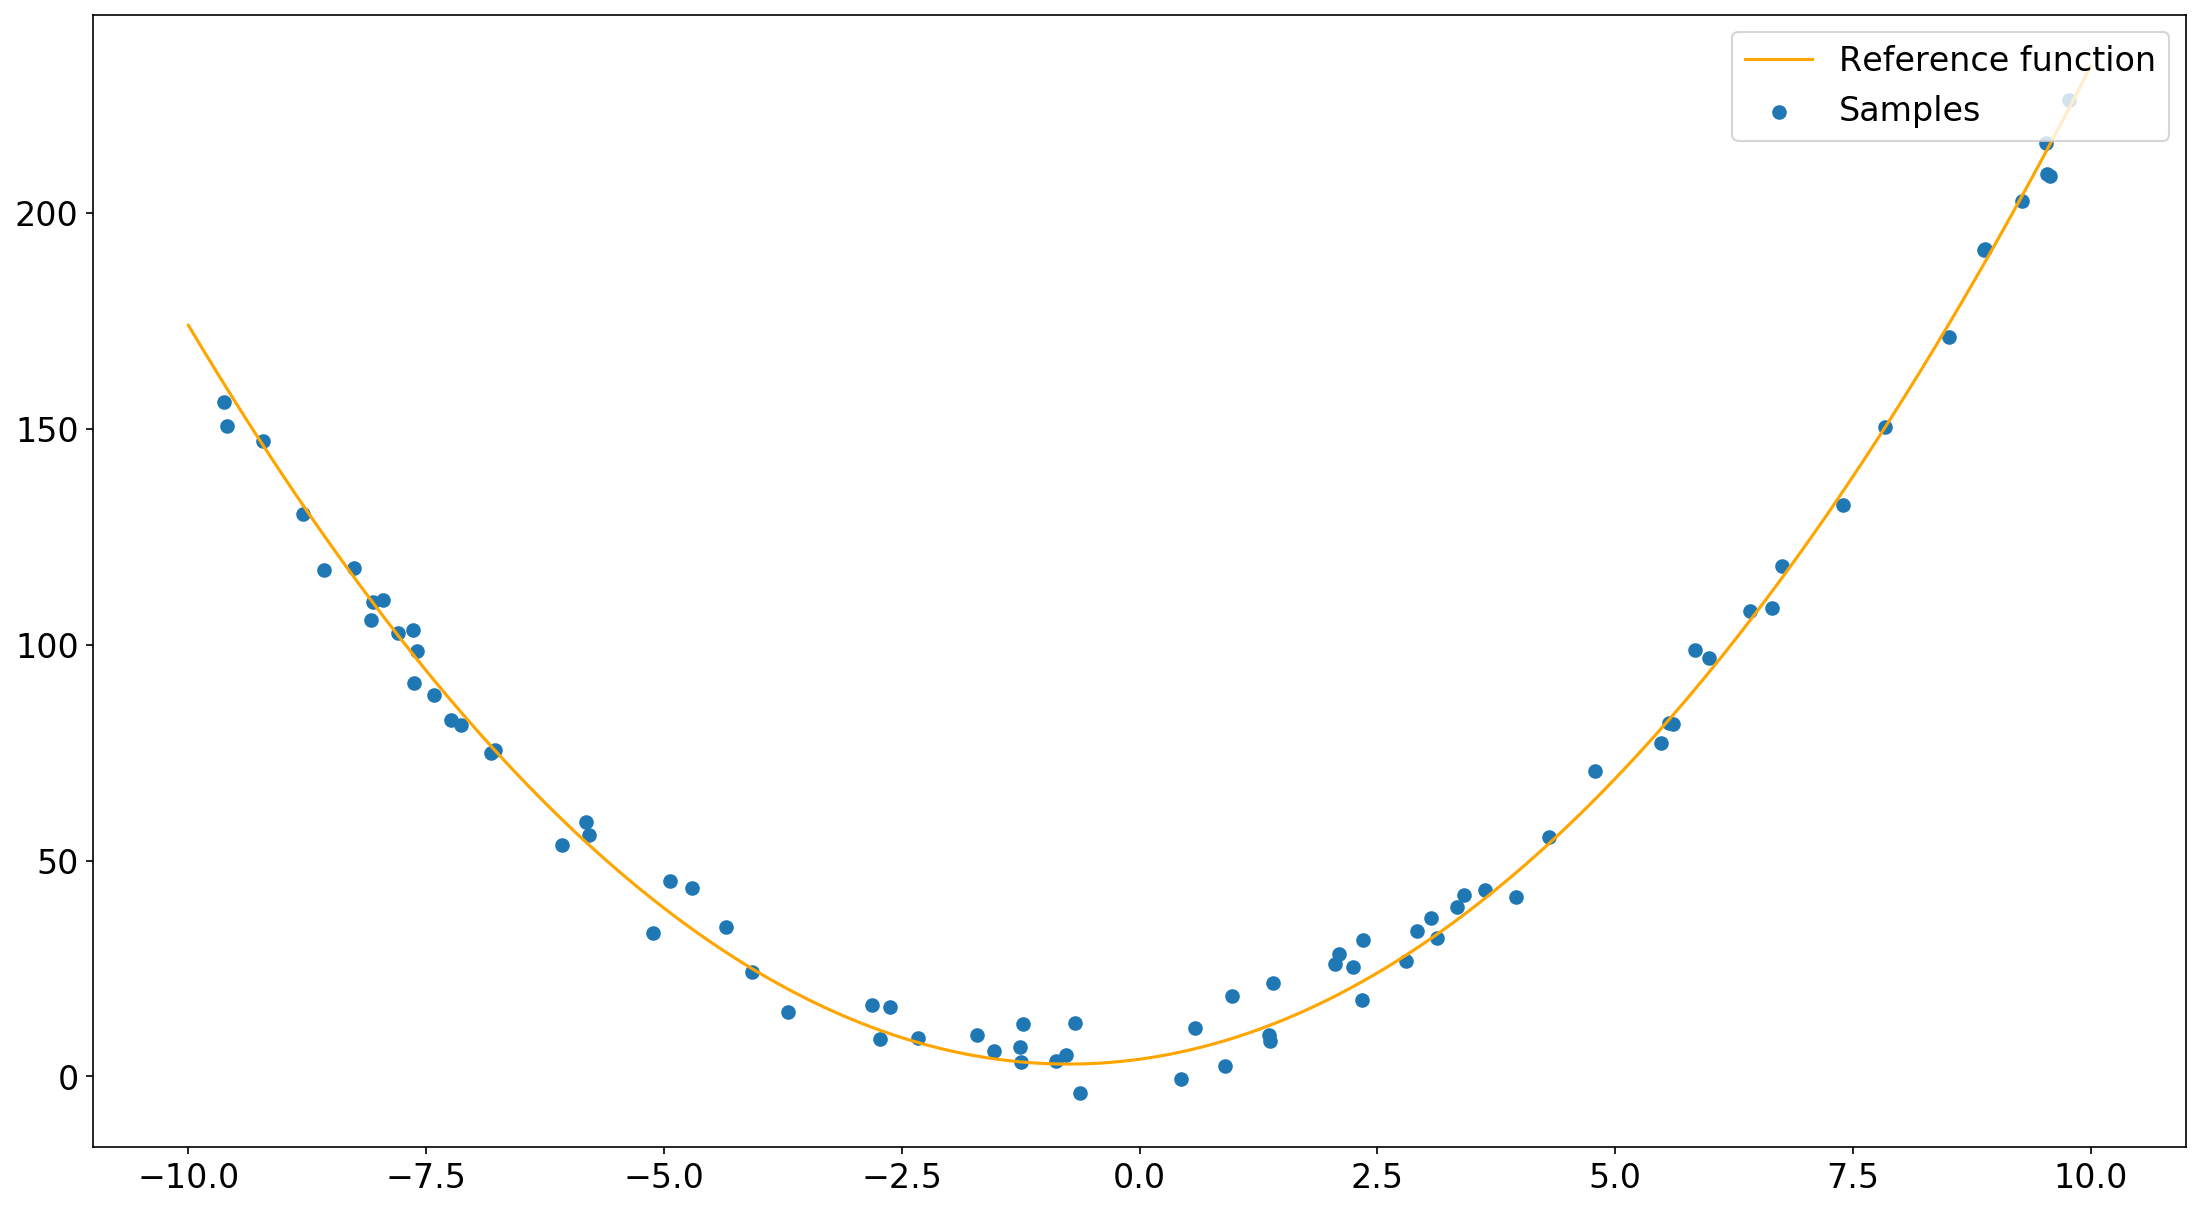

In [20]:
np.random.seed(0) # We want the samples to be the same everytime
n_samples = 80

x_sampling = np.sort(np.random.rand(n_samples)*20-10)
y = parab(x_sampling) + np.random.randn(n_samples) * 5 # Samples + noise

plt.figure(figsize=(18, 10), dpi= 150, facecolor='w', edgecolor='k')
plt.plot(x, parab(x), color='orange', label="Reference function")
plt.scatter(x_sampling, y, label="Samples")
plt.legend(loc="upper right")

plt.savefig('Parab.png', dpi=150)

plt.show()

[2.62619365]
71.94758505184
[3.08296041 1.94495935]
6.662075578796276
[ 2.94819441e+00  2.17043321e+00  8.31398925e-03 -1.21699551e-02
 -2.11976196e-04  2.14619415e-04  1.65487288e-06 -1.18943313e-06]
5.983919206288832


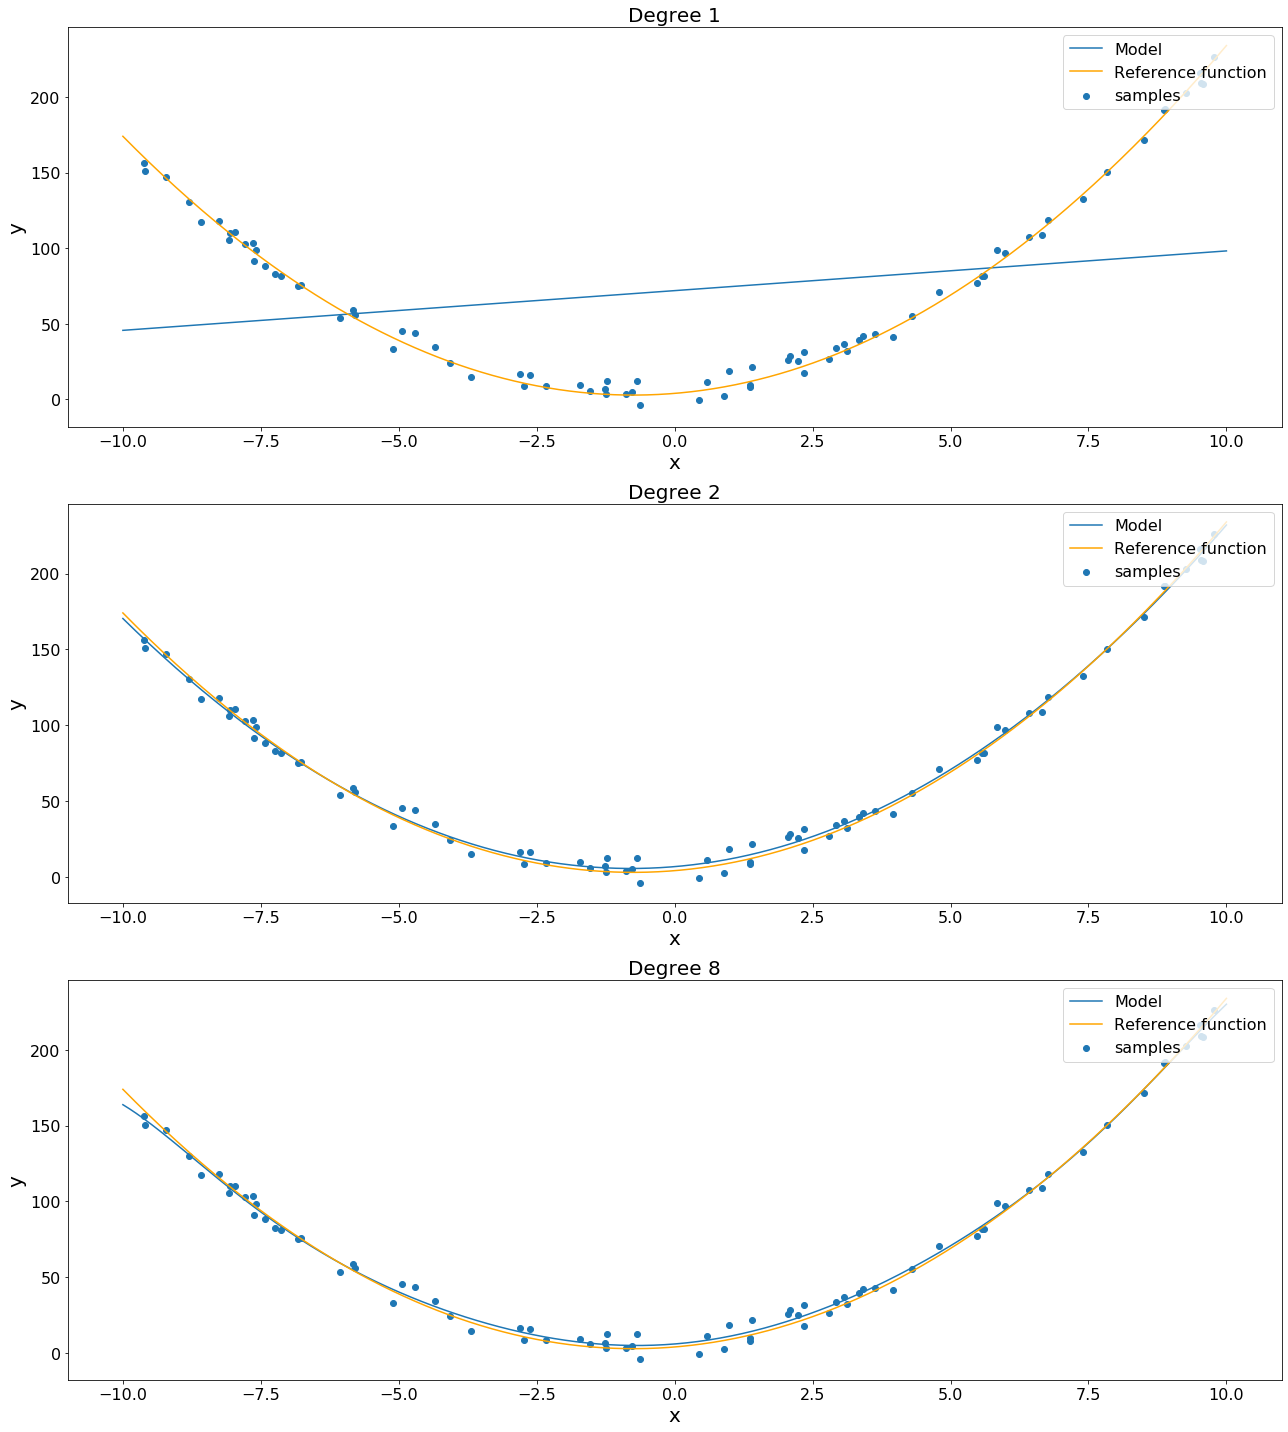

In [21]:
degrees = [1, 2, 8]


plt.figure(figsize=(18, 20))


for i in range(len(degrees)):
    ax = plt.subplot(len(degrees), 1, i + 1)

    polynomial_features = PolynomialFeatures(degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    model.fit(x_sampling[:, np.newaxis], y)
   
   
    plt.plot(x, model.predict(x[:, np.newaxis]), label="Model")
    plt.plot(x, parab(x), color='orange', label="Reference function")
    plt.scatter(x_sampling, y, label="samples")
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)
    plt.legend(loc="upper right", fontsize=16)
    plt.title("Degree {}".format(degrees[i]), fontsize=20)
    plt.tight_layout()
    print(model.steps[1][1].coef_)
    print(model.steps[1][1].intercept_)
    
plt.savefig('Parab_degrees.png', dpi=150)
plt.show()